#### Классические алгоритмы машинного обучения (один шаг до начала ИИ)


*   Линейная регрессия
*   Логистическая регрессия
*   Деревья решений
*   SVM

> Все эти алгоритмы относятся к одной большой, можно даже сказать подавляющей группе алгоритмов, которые называют "обучение с учителем", "обучение по прецендентам", "supervised learning" 

Беру все прямо с [википедии](https://ru.wikipedia.org/wiki/Линейная_регрессия), предлагаю открыть, чтобы посмотреть где эта модель используется в реальной жизни.

> регрессионная модель 

$y = f(x,b) + E$

$f(x,b) = b_0 + b_1x_1 + ... + b_nx_n$

Давайте разбираться.
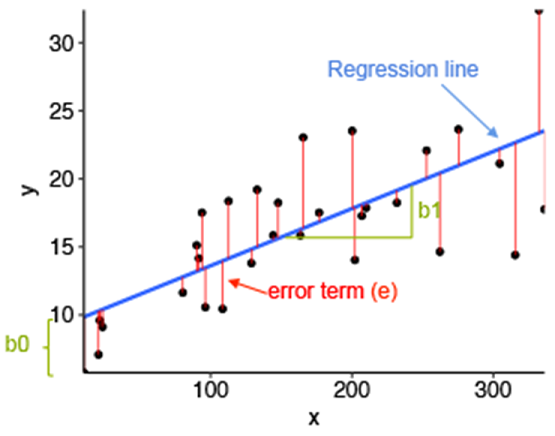

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть $$f(x) = a⋅x + b$$, где $a$ — наклон линии, а $b$ — его сдвиг. Таким образом, решение линейной регрессии определяет значения для $a$ и $b$, так что $f(x)$ приближается как можно ближе к $y$. 

Посмотрим на пример ниже

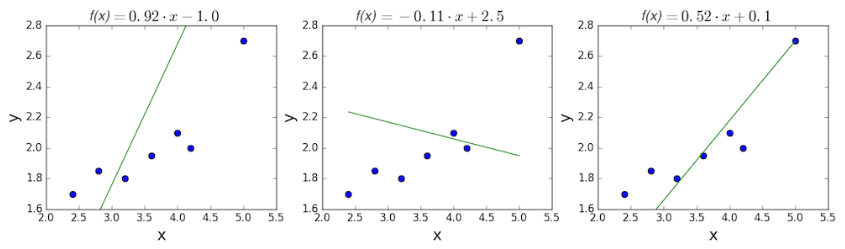



> Что нужно сделать, чтобы найти эту заветную прямую? Для начала импортируем библиотеки!

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

#### Линейная регрессия
> алгоритм, реализующий обучение с учителем, это значит, что нам нужны "готовые ответы", которые мы будем скармливать алгоритму для обучения. Введите несколько точек, которые будут этими самыми ответами, которые алгоритм будет стараться угадать. Только не вводите что-то вроде 1,2,3,4 - это обычная прямая.
 
  $y = x$

> Но и не переусердствуйте :D. Придумайте значения y, которые можно легко отобразить на промежутке от -10 до 10. Иначе будет трудно визуализировать!

In [ ]:
#Enter several random point
y = [4, -1, 7, 12, 6, 15, 14]
x = [i for i in range(len(y))]

In [ ]:
x, y

([0, 1, 2, 3, 4, 5, 6], [4, -1, 7, 12, 6, 15, 14])

In [ ]:
#y = ax + b
import random
a = random.random()
b = 0
a

0.4366379781904336

In [ ]:
def predict(a, b, x):
    #Делаем предсказание. Считаем y_hat.
    return [a*x[i] + b for i in range(len(x))]

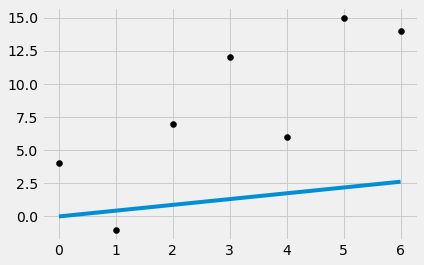

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
y_hat = predict(a, b, x)
plt.plot(x, y_hat)

In [ ]:
y_hat

[0.0,
 0.07293458797717534,
 0.14586917595435067,
 0.218803763931526,
 0.29173835190870134,
 0.3646729398858767,
 0.437607527863052]

Теперь нужно определить как мы будем считать ошибку алгоритма. Функций ошибки так много, что рассказывать только о них можно часами. Давайте разберем самые популярные.
> MAE (mean absolute error или абсолютная ошибка) 
$$\text{MAE} = \sum_{i=1}^n\frac{|y_i - \hat{y_i}|}{n}$$

> MSE (mean squeare error или средняя квадратичная ошибка) 
$$\text{MSE} = \sum_{i=1}^n\frac{(y_i - \hat{y_i})^2}{n}$$

> Ииии десерт!
 $$\text{CrossEntropyLoss} = \sum_{i=1}^n -(y_i log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i}))$$

P.S. Это знак суммы $\sum_{i=1}^n$ Он означает, что мы хотим сложить все числа от 1 до n. Например

$\sum_{i=1}^5 = 1 + 2 + 3+ 4 + 5 = 15$

In [ ]:
def calculate_statistics(y, y_hat):
    if not len(y) == len(y_hat):
        raise ValueError
    error = 0
    grads = []
    for i in range(len(y)):
        #Считаем MSE для i-ой точки
        error += (y[i] - y_hat[i]) ** 2 / len(y)
        #Считаем градиент для i-ой точки.
        gradient = -2 * (y[i] - y_hat[i]) / len(y)
        #Складываем подсчитанный градиент. Далее будем использовать этот список
        #чтобы обновить параметры модели
        grads.append(gradient)
    return error, grads

err, grads = calculate_statistics(y, y_hat)
err

189385122.0998879

Итак мы определи:
 
1.   модель, которую собираемся обучать
2.   функцию ошибки, с помощью которой будем смотреть насколько модель ошиблась

Что делать дальше? Как обновить модель? Пора разобраться в производной. 

#### Производная 

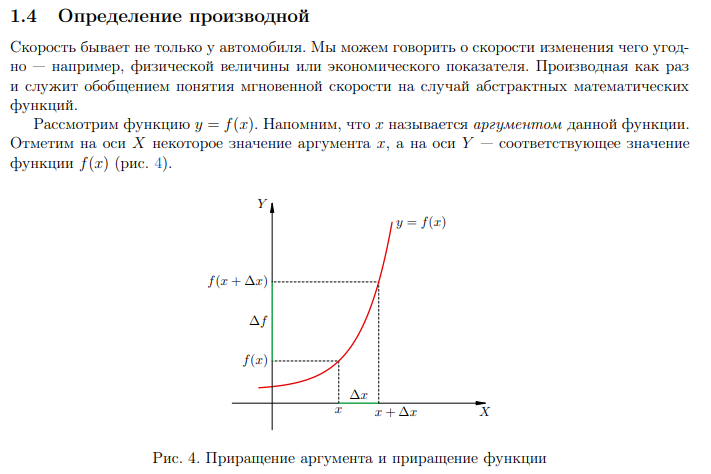 


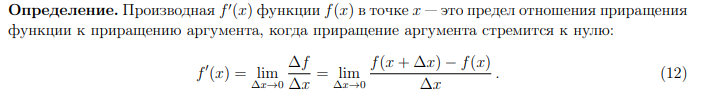

[взял отсюда](https://mathus.ru/math/der.pdf)

P.S. Если вы еще не прошли эти темы в школе, то советую [почитать](http://mathprofi.ru/opredelenie_proizvodnoi_smysl_proizvodnoi.html)

Своими словами. У нас есть какая-то функция (вообще не абы какая, но сейчас это не столь важно). Мы хотим сделать небольшой шаг в направлении X, чтобы посмотреть как она себя ведет. Давайте рассмотрим пример для $y = x^2$

### Пара упражнений

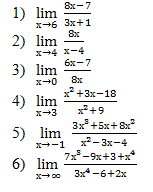

#### Градиентный спуск
Мы уже близки к решению нашей проблемы. Осталось понять как применять производную для обучения. 

Давайте вернемся к функции выше $y=x^2$, мы уже знаем формулу, по которой можно найти производную этой функции в любой точке $f'(x) = 2x$. Вспомните, каким образом мы хотим искать ошибку модели! MSE - это как раз наша функция $y=x^2$! А что мы хотим сделать с ошибкой? Правильно минимизировать! Значит нам нужно найти точку, в которой функция принимает минимальное значение (функция, а не производная). Какая это точка?

.


.


.


.


.


.


.


.


.


.


.


.


.


.


.


.


.


.


.


.


Ну да, легко определить, что это 0. А вы скажите это компьютеру. 

In [ ]:
#Этот код не относится к обучению линейной регрессии. Я хотел вам показать 
#как работает минимизация ошибки на примере параболы. В начале я инициализирую x
#случайным образом, потом, зная производную параболы, на каждой итерации обновл-
#яется точка. В конце алгоритма точка должна быть близка к 0. Если это не так, 
#попробуйте увеличить количество итераций.

#Так что же делать? А ничего, у нас все есть, чтобы минимизировать ошибку. 
#Мы знаем направление роста функции, а раз мы хотим идти в обратном направлении,
#нужно просто домножить градиент на -1. Все вместе:

import random 
grad = lambda x: 2*x
lr = 0.01
iter_count = 100
func = lambda x: x * x
iter_verbose = 10
point = random.randint(-10, 10)
for i in range(iter_count):
    grad_in_point = grad(point)
    point = point - lr * grad_in_point
    if (i+1)%iter_verbose == 0:
        print('iter = {}, x = {:.4f}, y = {:.4f}'.format(i+1, point, func(point)))
print('final result = ', func(point))


iter = 10, x = -7.3537, y = 54.0762
iter = 20, x = -6.0085, y = 36.1017
iter = 30, x = -4.9094, y = 24.1018
iter = 40, x = -4.0113, y = 16.0906
iter = 50, x = -3.2775, y = 10.7422
iter = 60, x = -2.6780, y = 7.1716
iter = 70, x = -2.1881, y = 4.7878
iter = 80, x = -1.7878, y = 3.1964
iter = 90, x = -1.4608, y = 2.1339
iter = 100, x = -1.1936, y = 1.4246
final result =  1.4246236750634482


In [ ]:
def update_params(a,b,x, gradients, lr = 0.01):
    #Обновление параметров кажется немного неочевидным. Почему a, b обновляются
    #разными способами? Вам с этим предстоит познакомиться в школе. Дело в том,
    #что нужно использовать правило производной сложной функции.
    if not len(x) == len(gradients):
         raise ValueError
    delta_a, delta_b = 0, 0
    delta_b = sum(gradients)
    b -= lr * delta_b 
    for i in range(len(gradients)):
        delta_a += gradients[i] * x[i]
    a -= lr * delta_a
    return a, b

new_a, new_b = update_params(a, b, x, grads)
new_a, new_b

(-2623.1998427936296, -619.5975462285365)

a = 1.2006937272973774 | b = 0.1192487711457725 | error = 53.9760606800516
a = 1.5442155747884558 | b = 0.20767931494215724 | error = 33.369779844090566
a = 1.7931159093040707 | b = 0.2737299370131496 | error = 22.511239046011234
a = 1.973339119521366 | b = 0.32352552657178524 | error = 16.788203637248596
a = 2.1037165597086465 | b = 0.36151181172621044 | error = 13.770773811479012
a = 2.1979166883379686 | b = 0.3909157247663103 | error = 12.178786219927916
a = 2.265860548741261 | b = 0.41407955182784884 | error = 11.337802125827576
a = 2.314749175816005 | b = 0.4327034707239591 | error = 10.892501408805996
a = 2.349809324717549 | b = 0.4480215936176625 | error = 10.655687697028602
a = 2.3748347475310694 | b = 0.46092974511939916 | error = 10.52873856546934


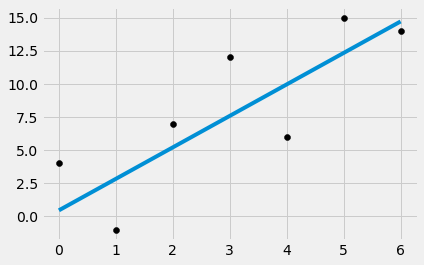

In [ ]:
b = 0
lr = 0.01
a = random.random()

for i in range(10):
    y_hat = predict(a, b, x)
    err, grads = calculate_statistics(y, y_hat)
    a,b = update_params(a, b, x, grads, lr)
    print('a = {} | b = {} | error = {}'.format(a, b, err))
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
y_hat = predict(a, b, x)

plt.plot(x, y_hat)

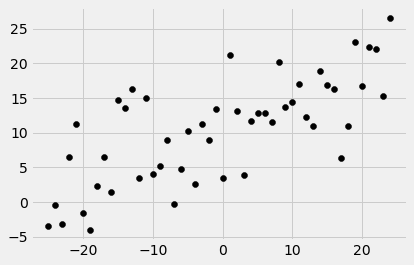

In [ ]:
A = random.random()
b = random.randint(-10, 10)
point_number = 100
x = np.arange(-25, 25, 1).tolist()
y = [A *x[i] + b + random.random() * 20 for i in range(len(x))]
plt.scatter(x, y, color='black')

### Задачи: ###
* Написать цикл for для 100 итераций обучения на сгенерированных данных
* Написать цикл while, который остановит обучение, если параметры модели обновляются меньше чем на 0.001
* Вывести ошибку между A, b и параметрами a', b' модели. 

a = 0.07942823807257338 | b = 0 | error = 154.22808587685964
1.194747188395708 0.2096674764504645
a = 1.194747188395708 | b = 0.2096674764504645 | error = 284.6092503127424
-2.3387172093641233 0.42629479287515115
a = -2.3387172093641233 | b = 0.42629479287515115 | error = 1635.391598745629
8.864531204698787 0.6032549189937456
a = 8.864531204698787 | b = 0.6032549189937456 | error = 15248.44498720752
-26.64799666661945 0.8887083267305975
a = -26.64799666661945 | b = 0.8887083267305975 | error = 152084.16576366517
85.92957121953673 0.8133273875995299
a = 85.92957121953673 | b = 0.8133273875995299 | error = 1527189.493261233
-270.9420727889696 1.8652297461126512
a = -270.9420727889696 | b = 1.8652297461126512 | error = 15345730.021287385
860.3515577415803 -0.672622382629555
a = 860.3515577415803 | b = -0.672622382629555 | error = 154209006.1635572
-2725.874629561549 8.153218836508625
a = -2725.874629561549 | b = 8.153218836508625 | error = 1549653427.889726
8642.550642601564 -19.059718641

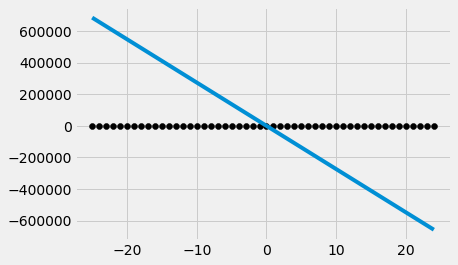

In [ ]:
lr = 0.01
model_a, model_b = random.random(), 0

for _ in range(10):
    y_hat = predict(model_a, model_b, x)
    err, grads = calculate_statistics(y, y_hat)
    print('a = {} | b = {} | error = {}'.format(model_a, model_b, err))
    model_a, model_b = update_params(model_a, model_b, x, grads, lr)
    print(model_a, model_b)
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
y_hat = predict(model_a, model_b, x)
plt.plot(x, y_hat)

a = 0.32890100514117326 | b = 0 | error = 2.7006747095169263
0.4085731608093949 0.02611427795729294
a = 0.4085731608093949 | b = 0.02611427795729294 | error = 2.0482900074291113
0.4767981744119161 0.048418254213122645
a = 0.4767981744119161 | b = 0.048418254213122645 | error = 1.5701458200629757
0.5352231533410655 0.06746055063588041
a = 0.5352231533410655 | b = 0.06746055063588041 | error = 1.2197045158920028
0.585258190798014 0.08371084164513574
a = 0.585258190798014 | b = 0.08371084164513574 | error = 0.9628581409669154
0.6281104715725006 0.09757121457646571
a = 0.6281104715725006 | b = 0.09757121457646571 | error = 0.7746085917743236
0.6648134700811918 0.10938589531645553
a = 0.6648134700811918 | b = 0.10938589531645553 | error = 0.6366344766039981
0.6962519468771022 0.11944957444164395
a = 0.6962519468771022 | b = 0.11944957444164395 | error = 0.5355078408920612
0.7231833482201941 0.12801453524560097
a = 0.7231833482201941 | b = 0.12801453524560097 | error = 0.4613871851777535
0.7

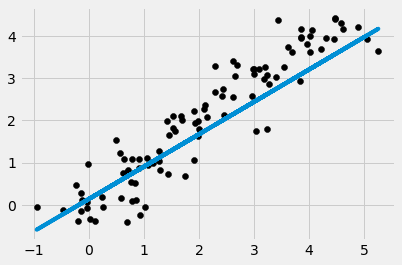

In [ ]:
x = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)
lr = 0.01
model_a, model_b = random.random(), 0

for _ in range(10):
    y_hat = predict(model_a, model_b, x)
    err, grads = calculate_statistics(y, y_hat)
    print('a = {} | b = {} | error = {}'.format(model_a, model_b, err))
    model_a, model_b = update_params(model_a, model_b, x, grads, lr)
    print(model_a, model_b)
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
y_hat = predict(model_a, model_b, x)
plt.plot(x, y_hat)

> Запустите код выше несколько раз.Поменяйте параметры lr, iter_count. Как вы думаете, почему получились такие результаты? Почему первая прямая совсем не такая, как мы ожидали, а вторая то, что ожидали увидеть? Вспомните про нормализацию.

1.1402839616427853 -0.5922112641248045


Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

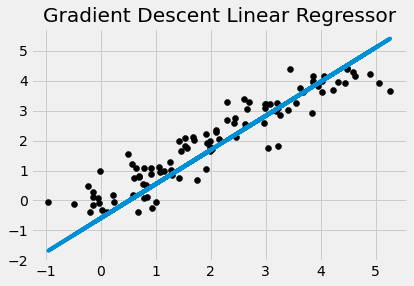

In [ ]:
#Все вместе. Реализуем линейную регрессию
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        self.b = 0
        self.m = random.randint(-10,10)
        n = X.shape[0]
        for _ in range(self.iterations):
            y_pred = self.predict(X)
            grad = -2 * (y - y_pred) /n 
            self.b -= self.learning_rate * np.sum(grad)
            self.m -= self.learning_rate * X.T @ grad
        print(self.m, self.b)

    def predict(self, X):
        return self.m * X + self.b

LR = GradientDescentLinearRegression(0.01, 100)
LR.fit(x, y)
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
plt.plot(x, LR.predict(x))
plt.gca().set_title("Gradient Descent Linear Regressor")

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)

LinearRegression()

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

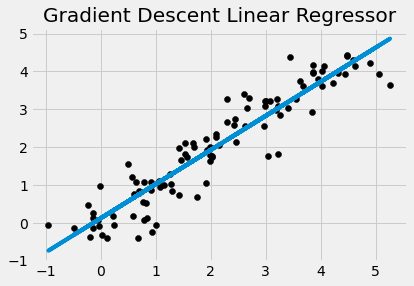

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x.reshape(-1,1)))
plt.gca().set_title("Gradient Descent Linear Regressor")

> Кажется что линия не разделяет наши сгенерированные точки, почему?

### Многомерная линейная регрессия.
> Мы рассмотрели одномерный случай, когда "ответ" (y) зависит только от одного признака (x). Но если вы помните статью из вики, то там линейная регрессия описывалась с помощью нескольких парметров 

$f(x,b) = b_0 + b_1x_1 + ... + b_nx_n$

В реальной жизни, разумеется, на предсказание влияет множество факторов. Пример может показаться избитым, но все таки, как формируется цена на квартиру? Она, конечно, же зависит от множества факторов, думаю, что вы и сами можете представить какими они могут быть.

> Рассмотрим пример из реальной жизни и попробуем предсказать цену дома, благо есть подготовленный [датасет](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). В нем собраны данные с 1990 года. Вот факторы, которые влияют на стоимость:

* MedInc median income in block group

* HouseAge median house age in block group

* AveRooms average number of rooms per household

* AveBedrms average number of bedrooms per household

* Population block group population

* AveOccup average number of household members

* Latitude block group latitude

* Longitude block group longitude

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

Не смотря на то,что гугл очень богатая компания, давайте пожалеем его и не будем обучаться на всем датасете.

In [ ]:
X, y  = dataset.data[0:100], dataset.target[0:100]

In [ ]:
X.shape, y.shape

In [ ]:
X[0], y[0]

In [ ]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X, y)

Проблема многомерных данных в том, что их очень сложно визуализировать. Давайте попробуем нарисовать прямую, которая делает предсказание только по одному признаку

In [ ]:
plt.scatter(X[:,0], y, color='black')
plt.plot(X[:,0], regr.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

In [ ]:
X, y  = dataset.data[250:750, 1], dataset.target[250:750]

In [ ]:
X[0], y[0]

In [ ]:
X.shape, y.shape
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
LR = LinearRegression()
LR.fit(X, y)
plt.scatter(X, y, color='black')
plt.plot(X, LR.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

#Занятие номер 2

### На прошлом занятии вы познакомились с производной и пределом функции. Еще раз кратко напомню что такое производная.

Например, функция $y = 0.5x$. Давайте найдем ее производную по формуле выше.

$y'(x) = \lim_{x\to0}\frac{f(x + \Delta x) - f(x)}{\Delta x} = \lim_{x\to0}\frac{0.5(x + \Delta x) - 0.5x}{\Delta x} = \lim_{x\to0}\frac{0.5 \Delta x}{\Delta x} = 0.5 $

Это можно описать следующим образом. За один шаг в направлении x функция y вырастет в половину роста x.

### Logistic Regression
На этом занятии вам нужно реализовать Logistic Regression. Давайте снова прибегнем к [Wiki](http://www.machinelearning.ru/wiki/index.php?title=Логистическая_регрессия)

На это занятии вам нужно реализовать:
1. Сигмоиду: $f(x) = \frac{1}{1+e^{-x}}$
2. Нарисовать сигмоиду
3. Разобраться с функцией потерь (смотри десерт выше)
4. Написать BatchGenerator, чтобы обучать на всей выборке.
5. Собрать все вместе и написать класс

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
#не завбывайте, что numpy по умолчанию работает с векторами! Если передать
#функции вектор, то она должна вернуть вектор, к каждому элементу которого
#применена функция сигмоиды
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

assert sigmoid(0) == 0.5 
assert sigmoid(-500).round() == 0.0
assert sigmoid(100).round() == 1.0


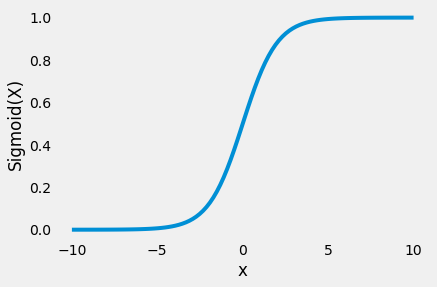

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

Когда вы построили график функции $f(x) = \frac{1}{1+e^{-x}}$, можно разбираться с функцией потерь:

 $$\text{CrossEntropyLoss} = \frac{1}{n}\sum_{i=1}^n -(y_i log(\hat{y_i}) + (1-y_i)log(1-\hat{y_i}))$$

Обычно о логистической регрессии говорят, когда требуется реализовать бинарную классификацию. Логистическая регрессия идеально подходит для этой задачи, так как выходной параметр сигмоиды находится в промежутку от 0 до 1. А значит и наши готовые ответы $y_i$ принимают либо значение 0, либо 1. Возвращаясь к формуле выше, это значит, что используется только половина выражаения. Рассммотрим 2 случая $y_i = 0$ и $y_i = 1$

* $y_i$ равен 1, тогда правая часть $(1-y_i)log(1-\hat{y_i}) = 0$
* $y_i$ равен 0, тогда левая часть $y_i log(\hat{y_i}) = 0$

In [ ]:
def CEL(y, y_hat):
    """y - известные "ответы"
       y_hat - предсказания модели
       hint используйте np.mean
    """
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

assert CEL(0, 0.1).round() == -.0 
assert CEL(0, 0.8).round() == 2.0 
assert CEL(1, 0.1).round() == 2
assert CEL(1, 0.8).round() == 0.0

In [ ]:
print("Расстояние между близкими классами (y=0, y_hat = 0.1) = {:.6f}\n\
и между разными классами (y=0, y_hat = 0.8) = {:.6f}".format(CEL(0, 0.1),CEL(0, 0.8) ))

Расстояние между близкими классами (y=0, y_hat = 0.1) = 0.105361
и между разными классами (y=0, y_hat = 0.8) = 1.609438


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
#Создает датасет, в котором представлен вектор X с 2мя признаками (n_features)
#с 2мя "центрами". Задача состоит в том, чтобы по 2м признакам определить к
#центру принадлежит точка.
X, y = datasets.make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

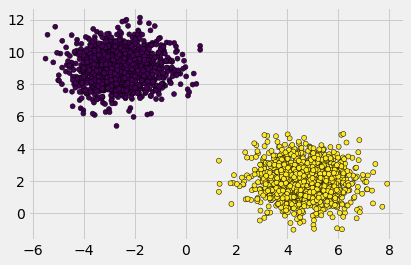

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")

Как посчитать accuracy из задачи get_acc:


$\frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}$

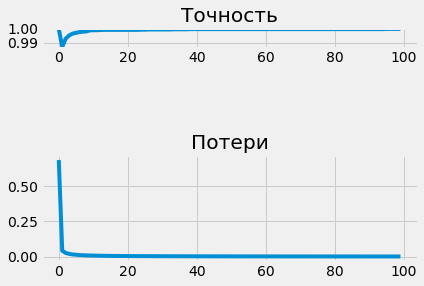

In [ ]:
class LogisticRegressionGD:
    '''
    A simple logistic regression for binary classification with gradient descent
    '''

    def __init__(self):
        pass

    def init_weights(self, input_size, output_size):
        """
            Инициализирует параметры модели
            W - матрица размерности (input_size, output_size)
            инициализируется рандомными числами из
            нормального распределения со средним 0 и стандартным отклонением 0.01
            b - равен 0
            hint посмотрите параметры random.normal
        """
        np.random.seed(42)
        self.W = np.random.normal(loc=0, scale=0.01, size = (input_size, output_size))  # YOUR_CODE
        self.b = np.array([0], dtype=np.float32)


    def get_loss(self, y_hat, y):
        """
            Данный метод вычисляет логистическую функцию потерь
            @param y_hat: Вероятности принадлежности к классу 1
            @param y: Истинные метки
        """
        # YOUR_CODE
        return CEL(y,y_hat)

    def get_prob(self, X):
        """
            Сделайте предсказание
        """
        return sigmoid(X @ self.W + self.b)

    def get_acc(self, y_hat, y, threshold=0.5):
        """
            Данный метод вычисляет accuracy:
            acc = \frac{1}{len(y)}\sum_{i=1}^{len(y)}{I[y_i == (p_i >= threshold)]}
        """
        return np.sum(y == (y_hat >= 0.5)) /len(y)

    def fit(self, X, y, num_epochs=100, lr=0.01):
        self.init_weights(X.shape[1], y.shape[1])
        accs, losses = [], []
        for _ in range(num_epochs):
            p = self.get_prob(X)
            #Правильно укажите что из чего вычитать.
            error = p - y
            W_grad = X.T @ error / y.shape[0]
            b_grad = np.sum(error) / y.shape[0]
            self.W -= W_grad 
            self.b -= b_grad
            # необходимо для стабильности вычислений под логарифмом
            p = np.clip(p, 1e-10, 1 - 1e-10)

            log_loss = self.get_loss(p, y)
            losses.append(log_loss)
            acc = self.get_acc(p, y)
            accs.append(acc)

        return accs, losses

model = LogisticRegressionGD()
accs, losses = model.fit(X_train, y_train, 100)
figure = plt.figure()
plt1 = figure.add_subplot(10,1,1)
plt2 = figure.add_subplot(2,1,2)

plt1.plot(accs)
plt1.set(title = "Точность")

plt2.plot(losses)
plt2.set(title = "Потери")

plt.show()

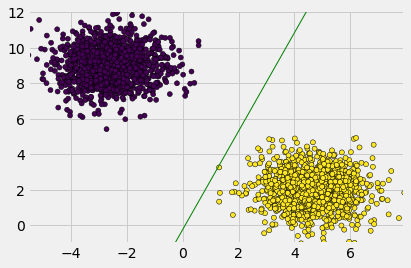

In [ ]:
y = X_test @ model.W + model.b
x1_min, x1_max = X_test[:,0].min(), X_test[:,0].max()
x2_min, x2_max = X_test[:,1].min(), X_test[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = (grid @ model.W + model.b ).reshape(xx1.shape)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green');

## Регрессии все!##
Завершая математику, давайте пройдемся по основным моментам.

1. Мы поставили себе задачу - научиться предсказывать будущее.
2. Вы ввели несколько точек, на которых собирались обучить модель.
3. Познакомились с функцией потерь (тем, как считать ошибку).
4. Узнали что такое производная и как с ее помощью найти минимум функции (в нашем случае функции потерь)
5. Построили модель линейной регрессии!

## SVM ##

SVM - support vector machine

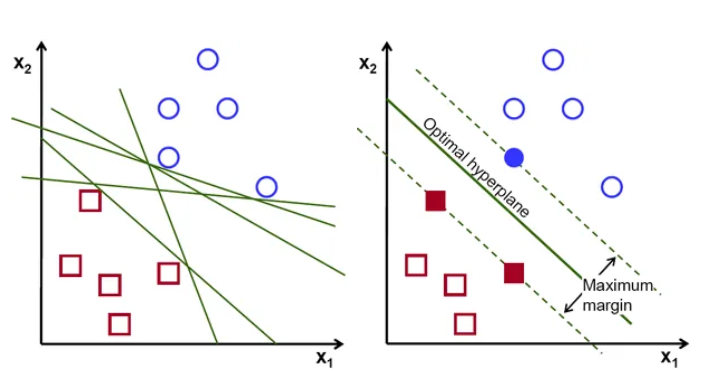

> SVM пытается максимизировать "зазор", расстояние между классами.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


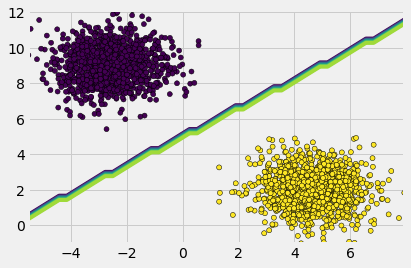

In [ ]:
import pylab as pl
from sklearn import svm

model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict(grid).reshape(xx1.shape)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test, s=25, edgecolor="k")
plt.contour(xx1, xx2, probs)

In [ ]:
from sklearn.metrics import accuracy_score
y_hat_test = model.predict(X_test).reshape(-1,1)
#accuracy = accuracy_score(y_test, y_hat_test)
accuracy = np.sum(y_hat_test == y_test)/len(y)
print('Точность предсказания {:5.2f} %'.format(accuracy * 100))

Точность предсказания 100.00 %


### Задание 1 ###
Sklearn предоставляет 4 возможных ядра для модели SVM:
* linear (уже использовался, смотри выше)
* linear svc
* rbf
* poly
Ваша задача-повторить предыдущий эксперимент с другим ядром. 

### К средних ###
**Очень популярый алгоритм для кластеризации**
> Кластеризация - задача группировки множества объектов на кластеры. Посмотрите [визуализацию](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

> Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

In [ ]:
from matplotlib import gridspec
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_decision_regions

In [ ]:
X, Y = make_classification(n_samples=350, n_features=2, 
                           n_informative=2, n_classes=3, 
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

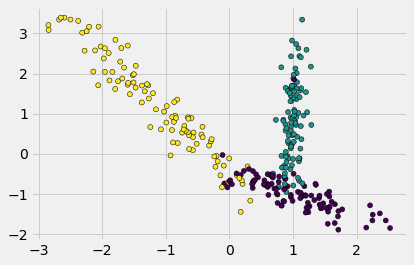

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=Y_train, s=25, edgecolor="k")

In [ ]:
models = []
for n_neighbors in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, Y_train)
    models.append(model)

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

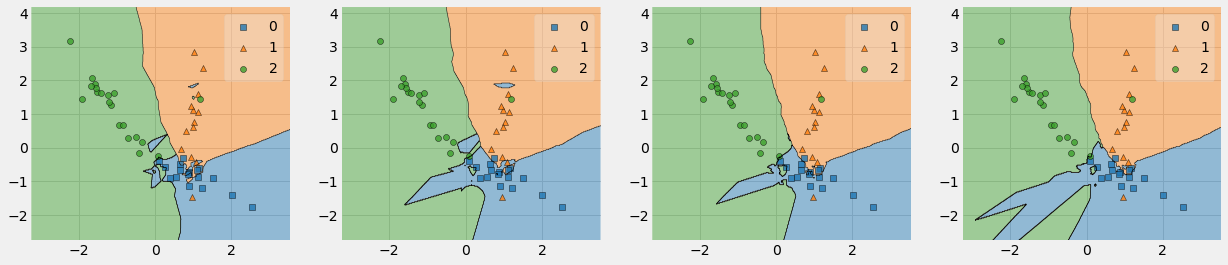

In [ ]:
fig, gs = plt.figure(figsize=(19,4)), gridspec.GridSpec(1, 4)

ax = []
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))

for i in range(4):
    plot_decision_regions(X_test, Y_test, models[i], ax=ax[i])

plt.show()